In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline 
%matplotlib inline

In [6]:
df=pd.read_csv("data_regression.csv")
df.columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount', 'month', 'Type_h', 'Type_t',
       'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB', 'CouncilArea_Banyule City Council',
       'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council',
       'CouncilArea_Macedon Ranges Shire Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Maribyrnong City Council',
       'CouncilArea_Maroondah

Build model - Ridge Regression

In [7]:
y= df['Price']
X = df.drop(['Price'], axis = 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from timeit import default_timer as timer

start = timer()
# ...

# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

def two_score(y_true,y_pred):    
    score = MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    #print (score)
    return score
def two_scorer():
    return make_scorer(two_score, greater_is_better=False) # change for false if using MSE

# steps
steps = [('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-10, 2, 20)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3, scoring= two_scorer())

# Fit to the training set
cv.fit(X_train, y_train)

#predict on train set
y_pred_train=cv.predict(X_train)

# Predict test set
y_pred_test=cv.predict(X_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
end = timer()
print(end - start)

c:\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.722374596980563e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.447697191026297e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.344362021281715e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Root Mean Squared Error: 410511.4300866021
3.1784531810532854


In [11]:
cv.best_params_

{'ridge__alpha': 0.2976351441631313}

In [74]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(alpha = cv.best_params_['ridge__alpha']), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error', %%shuffle)

In [75]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   -0.00000000e+00]
 [ -1.12649965e+11  -5.34632847e+10  -5.34632847e+10  -5.34632847e+10
   -5.34632847e+10]
 [ -1.27001036e+11  -1.10134735e+11  -1.10134735e+11  -1.10134735e+11
   -1.10134735e+11]
 [ -1.67892571e+11  -1.14298041e+11  -1.14298041e+11  -1.14298041e+11
   -1.14298041e+11]
 [ -1.70575677e+11  -1.30202022e+11  -1.30202022e+11  -1.30202022e+11
   -1.30202022e+11]
 [ -1.57349329e+11  -1.36794538e+11  -1.56373561e+11  -1.56373561e+11
   -1.56373561e+11]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -3.90898637e+11  -4.26818009e+11  -4.32898934e+11  -4.05221701e+11
   -4.20805135e+11]
 [ -2.41286659e+11  -2.21427782e+11  -2.04712186e+11  -2.11387847e+11
   -2.23110601e+11]
 [ -1.57703442e+11  -1.85439290e+11  -1.73990032e+11  -1.60603586e+11
   -1.86172580e+11]
 [ -1.50732932e+11  -1.76853857e+11  -1.67712948e+11  -1.54305324e+11
   -1

In [76]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
100     6.530062e+10
500     1.135080e+11
1000    1.250169e+11
2500    1.382768e+11
5000    1.526529e+11
dtype: float64

 --------------------

Mean validation scores

 1       4.153285e+11
100     2.203850e+11
500     1.727818e+11
1000    1.651176e+11
2500    1.610943e+11
5000    1.598145e+11
dtype: float64


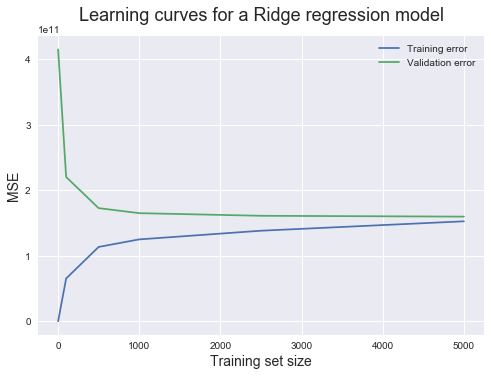

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Ridge regression model', fontsize = 18, y = 1.03)
plt.legend()


In [ ]:
# https://www.dataquest.io/blog/learning-curves-machine-learning/

In [42]:
parameters = {'ridge__alpha':np.logspace(-10, 2, 20)}
alphas = parameters['ridge__alpha']

In [47]:
rmse_list = []
for alpha in alphas:

    cv = Ridge(alpha= alpha)
    # Fit to the training set
    cv.fit(X_train, y_train)
    #predict on train set
    y_pred_train=cv.predict(X_train)

    # Predict test set
    y_pred_test=cv.predict(X_test)

    # rmse on train set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_list.append(rmse)
    #print("Root Mean Squared Error: {}".format(rmse))


c:\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.080971151874731e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [48]:
alphas

array([  1.00000000e-10,   4.28133240e-10,   1.83298071e-09,
         7.84759970e-09,   3.35981829e-08,   1.43844989e-07,
         6.15848211e-07,   2.63665090e-06,   1.12883789e-05,
         4.83293024e-05,   2.06913808e-04,   8.85866790e-04,
         3.79269019e-03,   1.62377674e-02,   6.95192796e-02,
         2.97635144e-01,   1.27427499e+00,   5.45559478e+00,
         2.33572147e+01,   1.00000000e+02])

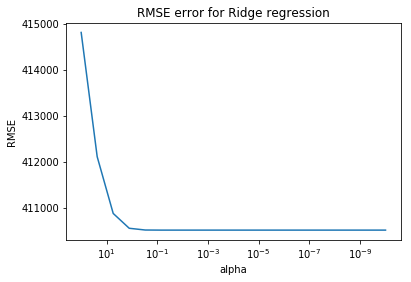

In [49]:
ax = plt.gca()

ax.plot(alphas, rmse_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE error for Ridge regression')
plt.axis('tight')
plt.savefig('Images/RMSE-alpha-Ridge.png')
plt.show()

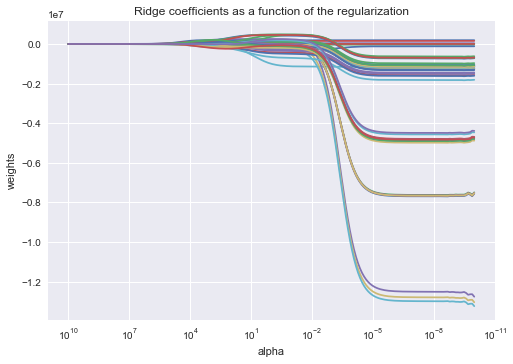

In [80]:
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()